<a href="https://colab.research.google.com/github/Umercia/wind_power/blob/master/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive from MyGoogleDrive
from google.colab import drive  
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.0 Import DATA


## 1.1 Import MERRA DATA

In [130]:
# importing
path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/"
filename = "MERRA2_N48.000_E001.250.txt"
file_path = path + filename
merra_df = pd.read_csv(file_path, 
                 sep = r"	", 
                 skiprows= 24, 
                 index_col='TimeStamp', 
                 parse_dates=True)
merra_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MeanWindSpeedUID_50.0m|Mean wind speed|L-1.00|U75.00,DirectionUID_50.0m|Wind direction|L0.00|U360.00,TemperatureUID_50.0m|Temperature|L-50.00|U60.00,Comment_50.0m,TimeStampStatus_50.0m,SampleStatus_50.0m,DataStatus_MeanWindSpeedUID_50.0m,DataStatus_DirectionUID_50.0m,DataStatus_TemperatureUID_50.0m,TemperatureUID_10.0m|Temperature|L-50.00|U60.00,Comment_10.0m,TimeStampStatus_10.0m,SampleStatus_10.0m,DataStatus_TemperatureUID_10.0m,PressureUID_2.0m|Pressure|L800.00|U1500.00,Comment_2.0m,TimeStampStatus_2.0m,SampleStatus_2.0m,DataStatus_PressureUID_2.0m,Unnamed: 20
TimeStamp,,,,,,,,,,,,,,,,,,,,
NaT,[m/s],[Degrees],[Deg C],NaN,NaN,NaN,NaN,NaN,NaN,[Deg C],NaN,NaN,NaN,NaN,[hPa],NaN,NaN,NaN,NaN,NaN
2001-01-01 00:00:00,9.96,177.8,0.7,NaN,0.0,0.0,0.0,0.0,0.0,1.2,NaN,0.0,0.0,0.0,98546.4,NaN,0.0,0.0,4.0,NaN
2001-01-01 01:00:00,10.42,185.0,1.1,NaN,0.0,0.0,0.0,0.0,0.0,1.7,NaN,0.0,0.0,0.0,98469.1,NaN,0.0,0.0,4.0,NaN
2001-01-01 02:00:00,13.03,195.6,2.4,NaN,0.0,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,0.0,98381.8,NaN,0.0,0.0,4.0,NaN
2001-01-01 03:00:00,13.47,196.4,2.7,NaN,0.0,0.0,0.0,0.0,0.0,3.3,NaN,0.0,0.0,0.0,98298.5,NaN,0.0,0.0,4.0,NaN


In [131]:
# columns selection and renaming
selection = ['MeanWindSpeedUID_50.0m|Mean wind speed|L-1.00|U75.00', 
             'DirectionUID_50.0m|Wind direction|L0.00|U360.00',
             'TemperatureUID_50.0m|Temperature|L-50.00|U60.00',
             'TemperatureUID_10.0m|Temperature|L-50.00|U60.00',
             'PressureUID_2.0m|Pressure|L800.00|U1500.00'            
            ]

merra_df = merra_df.loc["2001-01-01 00:00:00":, selection]
merra_df.index.names = ["time_stamp"]
merra_df.columns = ["ws_avg_50m", 
                    "dir_agv_50m", 
                    "temp_avg_50m", 
                    "temp_avg_10m", 
                    "pres_avg_2m"]

# convert to numeric
merra_df = merra_df.apply(pd.to_numeric, errors='coerce')

merra_df.head()

,ws_avg_50m,dir_agv_50m,temp_avg_50m,temp_avg_10m,pres_avg_2m
time_stamp,,,,,
2001-01-01 00:00:00,9.96,177.8,0.7,1.2,98546.4
2001-01-01 01:00:00,10.42,185.0,1.1,1.7,98469.1
2001-01-01 02:00:00,13.03,195.6,2.4,3.0,98381.8
2001-01-01 03:00:00,13.47,196.4,2.7,3.3,98298.5
2001-01-01 04:00:00,13.38,196.2,2.6,3.2,98266.9


In [134]:
#convert type and pass time_stapmp to index
# cols = merra_df.columns.drop("time_stamp")

# merra_df["time_stamp"] = df2["time_stamp"].apply(pd.to_datetime, errors='coerce')
# merra_df.set_index(["time_stamp"], inplace=True)


ws_avg_50m      float64
dir_agv_50m     float64
temp_avg_50m    float64
temp_avg_10m    float64
pres_avg_2m     float64
dtype: object

In [135]:
merra_df.dtypes

ws_avg_50m      float64
dir_agv_50m     float64
temp_avg_50m    float64
temp_avg_10m    float64
pres_avg_2m     float64
dtype: object

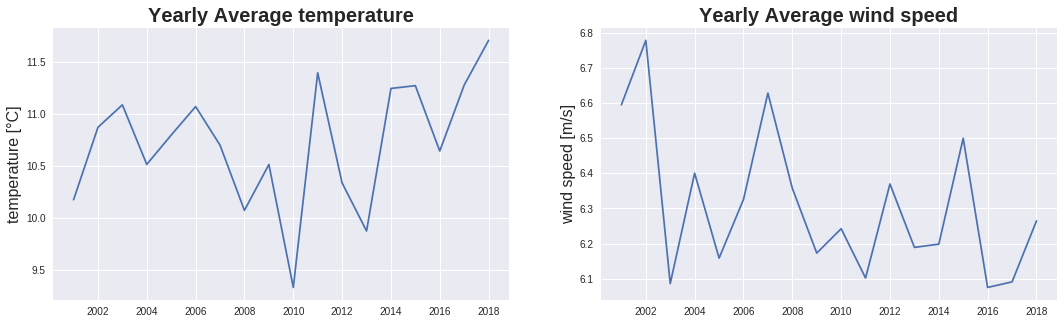

In [136]:
# plot yearly average
yearly_df = merra_df.resample("AS").mean()


plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.plot(yearly_df.index, yearly_df["temp_avg_50m"])
plt.title("Yearly Average temperature", fontweight="bold", size=20)
plt.ylabel("temperature [°C]", size=16)

plt.subplot(1, 2, 2)
plt.plot(yearly_df.index, yearly_df["ws_avg_50m"])
plt.title("Yearly Average wind speed", fontweight="bold", size=20)
plt.ylabel("wind speed [m/s]", size=16)

plt.show()

## 1.2 Import ERA DATA

In [140]:
# importing
path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/"
filename = "ERA5_N48.196702_E001.60000.txt"
file_path = path + filename

era_df = pd.read_csv(file_path, 
                     sep = r"	", 
                     skiprows= 32,
                     index_col='TimeStamp', 
                     parse_dates=True)


era_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,8,9,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MeanWindSpeedUID_10.0m|Mean wind speed|L-1.00|U75.00,DirectionUID_10.0m|Wind direction|L0.00|U360.00,Comment_10.0m,TimeStampStatus_10.0m,SampleStatus_10.0m,DataStatus_MeanWindSpeedUID_10.0m,DataStatus_DirectionUID_10.0m,MeanWindSpeedUID_100.0m|Mean wind speed|L-1.00|U75.00,DirectionUID_100.0m|Wind direction|L0.00|U360.00,Comment_100.0m,...,DataStatus_MeanWindSpeedUID_100.0m,DataStatus_DirectionUID_100.0m,TemperatureUID_2.0m|Temperature|L-50.00|U60.00,PressureUID_2.0m|Pressure|L800.00|U1500.00,Comment_2.0m,TimeStampStatus_2.0m,SampleStatus_2.0m,DataStatus_TemperatureUID_2.0m,DataStatus_PressureUID_2.0m,Unnamed: 22
TimeStamp,,,,,,,,,,,,,,,,,,,,,
NaT,[m/s],[Degrees],NaN,NaN,NaN,NaN,NaN,[m/s],[Degrees],NaN,...,NaN,NaN,[Deg C],[hPa],NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01 00:00:00,7.17,183.1,NaN,0.0,0.0,0.0,0.0,11.67,185.3,NaN,...,0.0,0.0,2.8,987.0,NaN,0.0,0.0,0.0,0.0,NaN
2001-01-01 01:00:00,7.16,186.1,NaN,0.0,0.0,0.0,0.0,12.00,188.9,NaN,...,0.0,0.0,2.9,986.1,NaN,0.0,0.0,0.0,0.0,NaN
2001-01-01 02:00:00,7.69,187.5,NaN,0.0,0.0,0.0,0.0,12.73,190.3,NaN,...,0.0,0.0,3.6,985.3,NaN,0.0,0.0,0.0,0.0,NaN
2001-01-01 03:00:00,7.87,186.8,NaN,0.0,0.0,0.0,0.0,13.08,190.2,NaN,...,0.0,0.0,3.9,984.3,NaN,0.0,0.0,0.0,0.0,NaN


In [141]:
era_df.columns

Index(['MeanWindSpeedUID_10.0m|Mean wind speed|L-1.00|U75.00',
       'DirectionUID_10.0m|Wind direction|L0.00|U360.00', 'Comment_10.0m',
       'TimeStampStatus_10.0m', 'SampleStatus_10.0m',
       'DataStatus_MeanWindSpeedUID_10.0m', 'DataStatus_DirectionUID_10.0m',
       'MeanWindSpeedUID_100.0m|Mean wind speed|L-1.00|U75.00',
       'DirectionUID_100.0m|Wind direction|L0.00|U360.00', 'Comment_100.0m',
       'TimeStampStatus_100.0m', 'SampleStatus_100.0m',
       'DataStatus_MeanWindSpeedUID_100.0m', 'DataStatus_DirectionUID_100.0m',
       'TemperatureUID_2.0m|Temperature|L-50.00|U60.00',
       'PressureUID_2.0m|Pressure|L800.00|U1500.00', 'Comment_2.0m',
       'TimeStampStatus_2.0m', 'SampleStatus_2.0m',
       'DataStatus_TemperatureUID_2.0m', 'DataStatus_PressureUID_2.0m',
       'Unnamed: 22'],
      dtype='object')

In [143]:
# columns selection and renaming
selection = ['MeanWindSpeedUID_10.0m|Mean wind speed|L-1.00|U75.00', 
             'DirectionUID_10.0m|Wind direction|L0.00|U360.00',
             'MeanWindSpeedUID_100.0m|Mean wind speed|L-1.00|U75.00',
             'DirectionUID_100.0m|Wind direction|L0.00|U360.00',
             'TemperatureUID_2.0m|Temperature|L-50.00|U60.00'         
            ]


era_df = era_df.loc["2001-01-01 00:00:00":, selection]
era_df.index.names = ["time_stamp"]
era_df.columns = ["ws_avg_10m", 
                   "dir_agv_10m", 
                   "ws_avg_100m", 
                   "dir_agv_100m",  
                   "temp_avg_2m"]

era_df = era_df.apply(pd.to_numeric, errors='coerce')
era_df.head()

,ws_avg_10m,dir_agv_10m,ws_avg_100m,dir_agv_100m,temp_avg_2m
time_stamp,,,,,
2001-01-01 00:00:00,7.17,183.1,11.67,185.3,2.8
2001-01-01 01:00:00,7.16,186.1,12.00,188.9,2.9
2001-01-01 02:00:00,7.69,187.5,12.73,190.3,3.6
2001-01-01 03:00:00,7.87,186.8,13.08,190.2,3.9
2001-01-01 04:00:00,7.85,183.6,13.02,186.4,4.5


In [145]:
era_df.describe()

,ws_avg_10m,dir_agv_10m,ws_avg_100m,dir_agv_100m,temp_avg_2m
count,157776.000000,157776.000000,157776.000000,157776.000000,157776.000000
mean,3.960144,182.592229,6.444396,182.652849,11.634492
std,1.939454,105.365883,2.898294,104.494571,7.294128
min,0.000000,0.000000,0.010000,0.000000,-16.800000
25%,2.500000,73.100000,4.430000,74.600000,6.500000
50%,3.650000,208.500000,6.230000,209.100000,11.400000
75%,5.090000,259.900000,8.140000,259.800000,16.600000
max,15.980000,359.900000,23.780000,359.900000,39.400000


## 1.3 Import wind turbine DATA 

In [146]:
# importing
path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/"
filename = "CDBO_WT11_20130110-20190101.csv"
file_path = path + filename

wtg11_df = pd.read_csv(file_path,
                       index_col='Date', 
                       parse_dates=True)

wtg11_df.head(3)

,WindSpeed_Avg,WindSpeed_Std,WindDir_Abs,Prod,FirstActAlarm,Temperature
Date,,,,,,
2013-01-10 00:10:00,4.4,0.50,130,155,0,6.0
2013-01-10 00:20:00,4.0,0.40,128,101,0,6.0
2013-01-10 00:30:00,3.9,0.30,126,76,0,6.0
2013-01-10 00:40:00,3.9,0.30,122,82,0,6.0
2013-01-10 00:50:00,3.9,0.35,120,84,0,6.0


In [147]:
# renaming
wtg11_df.index.names = ["time_stamp"]
wtg11_df.columns = ["ws_avg_80m", "ws_std_80m", "dir_agv_80m", "prod_avg", 
               "first_alarm",  "temp_avg_80m"]
wtg11_df.head(3)

,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m
time_stamp,,,,,,
2013-01-10 00:10:00,4.4,0.50,130,155,0,6.0
2013-01-10 00:20:00,4.0,0.40,128,101,0,6.0
2013-01-10 00:30:00,3.9,0.30,126,76,0,6.0
2013-01-10 00:40:00,3.9,0.30,122,82,0,6.0
2013-01-10 00:50:00,3.9,0.35,120,84,0,6.0


In [148]:
wtg11_df.dtypes

ws_avg_80m      float64
ws_std_80m      float64
dir_agv_80m       int64
prod_avg          int64
first_alarm       int64
temp_avg_80m    float64
dtype: object

In [149]:

wtg11_df = wtg11_df.loc["2014-01-01 00:00:00":"2018-12-31 23:50:00",:].tail(3)

,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m
time_stamp,,,,,,
2018-12-31 23:30:00,2.9,0.45,178,-15,0,13.0
2018-12-31 23:40:00,2.8,0.40,9,-16,0,13.0
2018-12-31 23:50:00,3.4,0.40,9,-13,0,13.0


# 2.0 Exploration

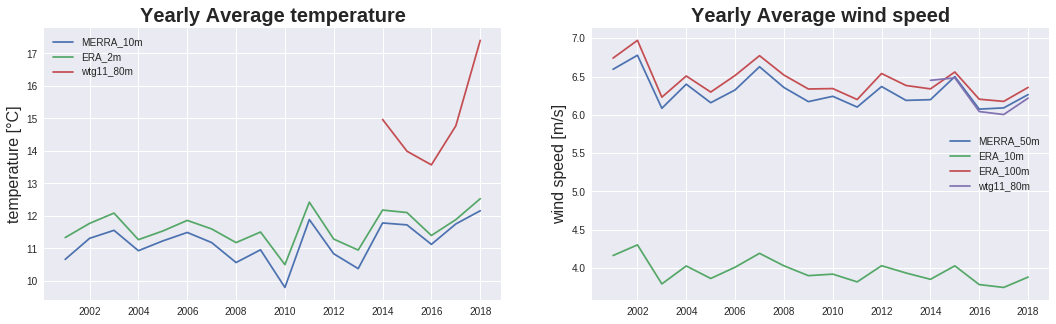

In [150]:
# plot yearly average
yearly_merra_df = merra_df.resample("AS").mean()
yearly_era_df = era_df.resample("AS").mean()
yearly_wtg11_df = wtg11_df.loc["2014-01-01 00:00:00":"2018-12-31 23:50:00",:].resample("AS").mean()


plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.plot(yearly_df.index, yearly_df["temp_avg_10m"], label="MERRA_10m")
plt.plot(yearly_era_df.index, yearly_era_df["temp_avg_2m"], label="ERA_2m")
plt.plot(yearly_wtg11_df.index, yearly_wtg11_df["temp_avg_80m"], label="wtg11_80m")
plt.title("Yearly Average temperature", fontweight="bold", size=20)
plt.ylabel("temperature [°C]", size=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(yearly_df.index, yearly_df["ws_avg_50m"], label="MERRA_50m")
plt.plot(yearly_era_df.index, yearly_era_df["ws_avg_10m"], label="ERA_10m")
plt.plot(yearly_era_df.index, yearly_era_df["ws_avg_100m"], label="ERA_100m")
plt.plot(yearly_wtg11_df.index, yearly_wtg11_df["ws_avg_80m"], label="wtg11_80m")
plt.title("Yearly Average wind speed", fontweight="bold", size=20)
plt.ylabel("wind speed [m/s]", size=16)
plt.legend()

plt.show()

In [151]:
wtg11_df.shape

(314208, 6)

In [0]:
months = wtg11_df.index.month.values

In [0]:
wtg11_df['year_month'] = wtg11_df.index.map(lambda x: 100*x.year + x.month)

In [171]:
wtg11_df.head()

,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m,year_month
time_stamp,,,,,,,
2013-01-10 00:10:00,4.4,0.50,130,155,0,6.0,201301
2013-01-10 00:20:00,4.0,0.40,128,101,0,6.0,201301
2013-01-10 00:30:00,3.9,0.30,126,76,0,6.0,201301
2013-01-10 00:40:00,3.9,0.30,122,82,0,6.0,201301
2013-01-10 00:50:00,3.9,0.35,120,84,0,6.0,201301


In [0]:
wtg11_df['day_of_the_month'] = wtg11_df.index.day.values

In [175]:
wtg11_df.head()

,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m,year_month,day_of_the_month
time_stamp,,,,,,,,
2013-01-10 00:10:00,4.4,0.50,130,155,0,6.0,201301,10
2013-01-10 00:20:00,4.0,0.40,128,101,0,6.0,201301,10
2013-01-10 00:30:00,3.9,0.30,126,76,0,6.0,201301,10
2013-01-10 00:40:00,3.9,0.30,122,82,0,6.0,201301,10
2013-01-10 00:50:00,3.9,0.35,120,84,0,6.0,201301,10


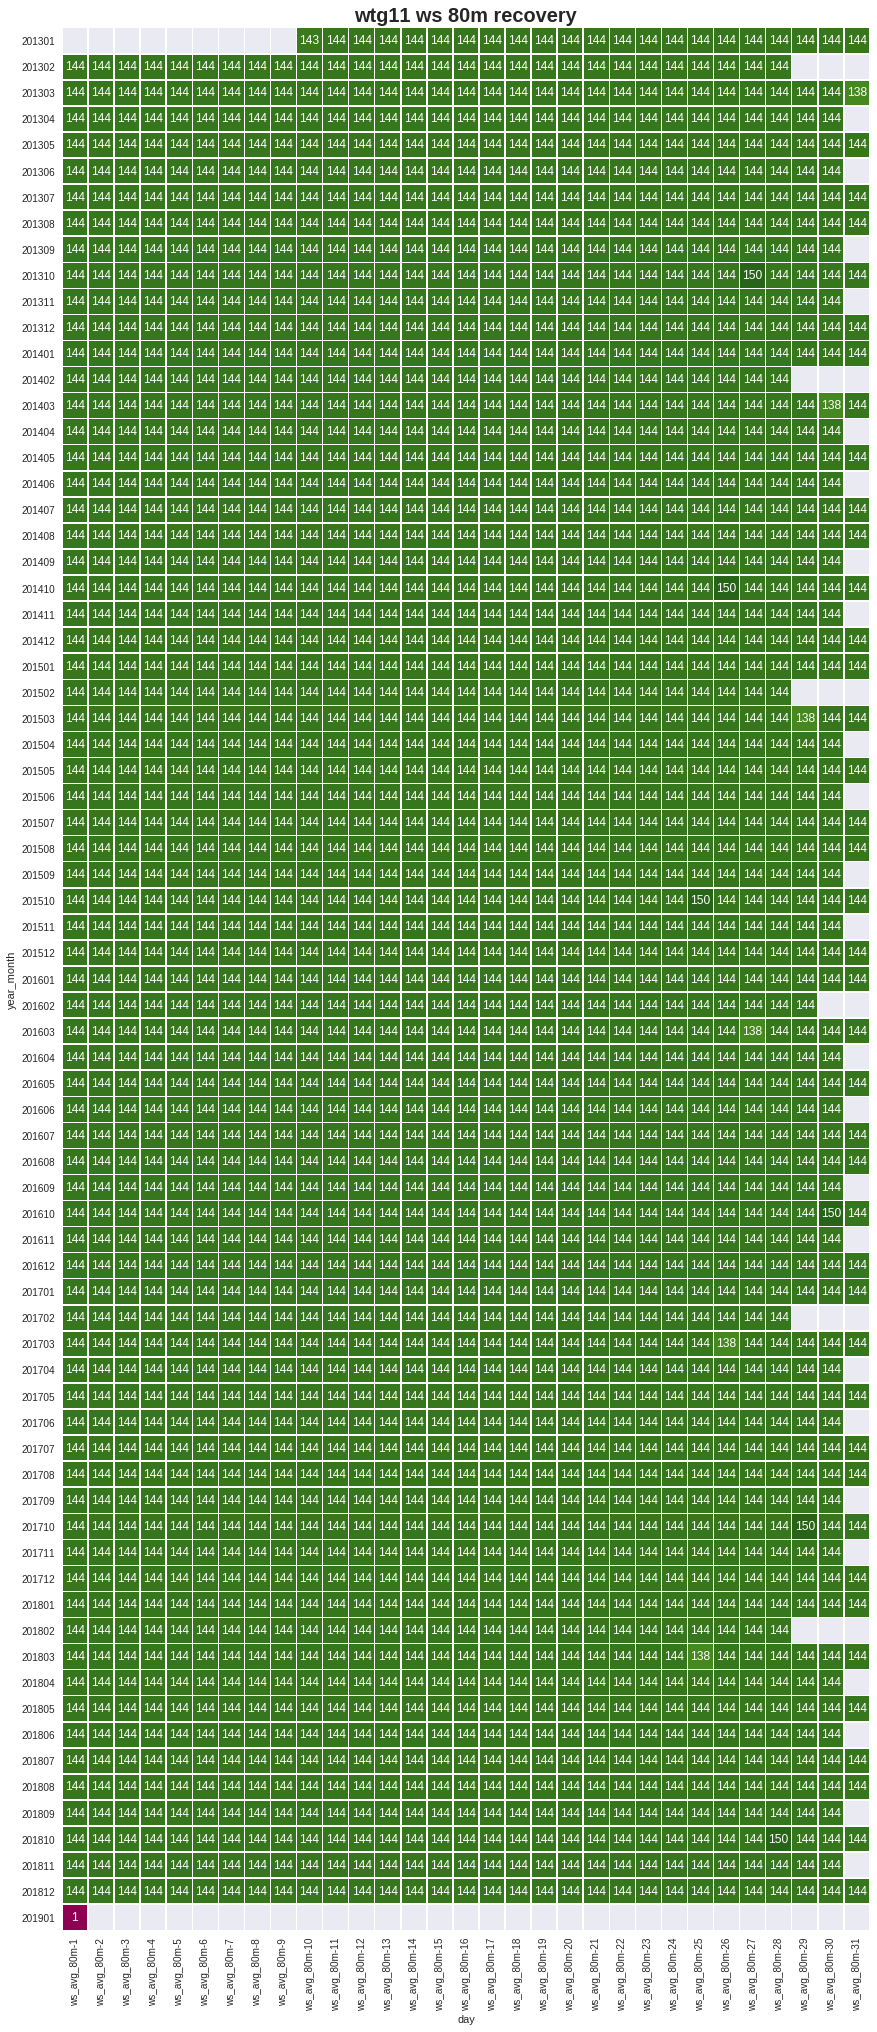

In [194]:
# plot recovery rate wind speed

# inputs
mat = wtg11_df.pivot_table(index="year_month", columns="day_of_the_month", 
                           aggfunc={"ws_avg_80m": "count"}, dropna=True)

# plot
plt.figure(figsize=(18,35))
sns.heatmap(mat, square=True, annot=True, fmt='g', linewidths=.5, 
            cmap= "PiYG", cbar=False)
plt.title("wtg11 ws 80m recovery", fontweight="bold", size=20)
plt.xlabel('day')
plt.ylabel('year_month');

We can see that:

*   Good recovery rate (no missing data)
*   All november have one days with 150 "10min records" (max at 144 for one day)
*   All October have one days with 138 "10min records".

This match the summer/winter local time change in France.  
This will need to be converted in order to be aligned with UTM.